In [35]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick2_ohlc
from matplotlib.dates import date2num, DayLocator, DateFormatter
import matplotlib.ticker as ticker
import finplot as fp

%matplotlib notebook

In [36]:
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2011,1,1)

In [37]:
df = web.DataReader('AAPL','yahoo',start,end)

In [38]:
df.loc['2010-02-19','signal'] = 'buy'
df.loc['2010-02-22','signal'] = 'buy'
df.loc['2010-02-23','signal'] = 'buy'
df.loc['2010-02-24','signal'] = 'buy'#

df.loc['2010-03-12','signal'] = 'sold'#
df.loc['2010-03-15','signal'] = 'sold'
df.loc['2010-03-16','signal'] = 'sold'

df.loc['2010-03-19','signal'] = 'buy'#
df.loc['2010-03-22','signal'] = 'buy'
df.loc['2010-03-23','signal'] = 'buy'

df.loc['2010-04-26','signal'] = 'sold'#
df.loc['2010-04-27','signal'] = 'sold'
df.loc['2010-04-28','signal'] = 'sold'

df.loc['2010-05-07','signal'] = 'buy' #
df.loc['2010-05-11','signal'] = 'buy'

df.loc['2010-05-14','signal'] = 'sold'
df.loc['2010-05-17','signal'] = 'sold' #
df.loc['2010-05-18','signal'] = 'sold'

df.loc['2010-05-20','signal'] = 'buy'
df.loc['2010-05-21','signal'] = 'buy' #
df.loc['2010-05-25','signal'] = 'buy'

df.loc['2010-06-01','signal'] = 'sold'
df.loc['2010-06-02','signal'] = 'sold' #
df.loc['2010-06-03','signal'] = 'sold'

df.loc['2010-06-08','signal'] = 'buy'#
df.loc['2010-06-09','signal'] = 'buy'
df.loc['2010-06-10','signal'] = 'buy'


df.loc['2010-06-17','signal'] = 'sold'#
df.loc['2010-06-18','signal'] = 'sold'
df.loc['2010-06-21','signal'] = 'sold'

df.loc['2010-07-01','signal'] = 'buy'
df.loc['2010-07-02','signal'] = 'buy'#
df.loc['2010-07-06','signal'] = 'buy'
df.loc['2010-07-07','signal'] = 'buy'

df.loc['2010-07-08','signal'] = 'sold'
df.loc['2010-07-09','signal'] = 'sold'
df.loc['2010-07-12','signal'] = 'sold'#

df.loc['2010-07-16','signal'] = 'buy' #
df.loc['2010-07-19','signal'] = 'buy'
df.loc['2010-07-20','signal'] = 'buy'

df.loc['2010-08-03','signal'] = 'sold' #
df.loc['2010-08-04','signal'] = 'sold'
df.loc['2010-08-05','signal'] = 'sold'

df.loc['2010-08-25','signal'] = 'buy'
df.loc['2010-08-26','signal'] = 'buy'#
df.loc['2010-08-27','signal'] = 'buy'

df.loc['2010-12-28','signal'] = 'sold'
df.loc['2010-12-29','signal'] = 'sold'

In [39]:
df['signal'] = np.where(df['signal'].isnull() ,'Wait or Hold',df['signal'])
df['buy'] = np.where(df['signal'] == 'buy',df['Close'],np.nan)
df['sold'] = np.where(df['signal'] == 'sold',df['Close'],np.nan)

In [40]:
df['EWMA-5'] = df['Close'].ewm(span=5).mean()
df['EWMA-12'] = df['Close'].ewm(span=12).mean()
df['EWMA-26'] = df['Close'].ewm(span=26).mean()
df['MACD'] = df['EWMA-12'] - df['EWMA-26']
df['SIGNAL LINE'] = df['MACD'].ewm(span=9).mean() 

In [41]:
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)
    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi
df['RSI-7'] = computeRSI(df['Close'],7)
df['RSI-14'] = computeRSI(df['Close'], 14)

In [42]:
df['SMA-20'] = df['Close'].rolling(window=20).mean()
df['Upper-band'] = df['SMA-20'] + 2*(df['Close'].rolling(20).std())
df['Lower-band'] = df['SMA-20'] - 2*(df['Close'].rolling(20).std())
# df[['Close','SMA-20','Upper-band','Lower-band']].plot()

In [43]:
low_min  = df['Low'].rolling( window = 9 ).min()
high_max = df['High'].rolling( window = 9 ).max()
df['%K'] = (100*(df['Close']-low_min)/(high_max-low_min))
df['%D']=df['%K'].ewm(span=5).mean() 

In [46]:
# df =df.reset_index()


<IPython.core.display.Javascript object>


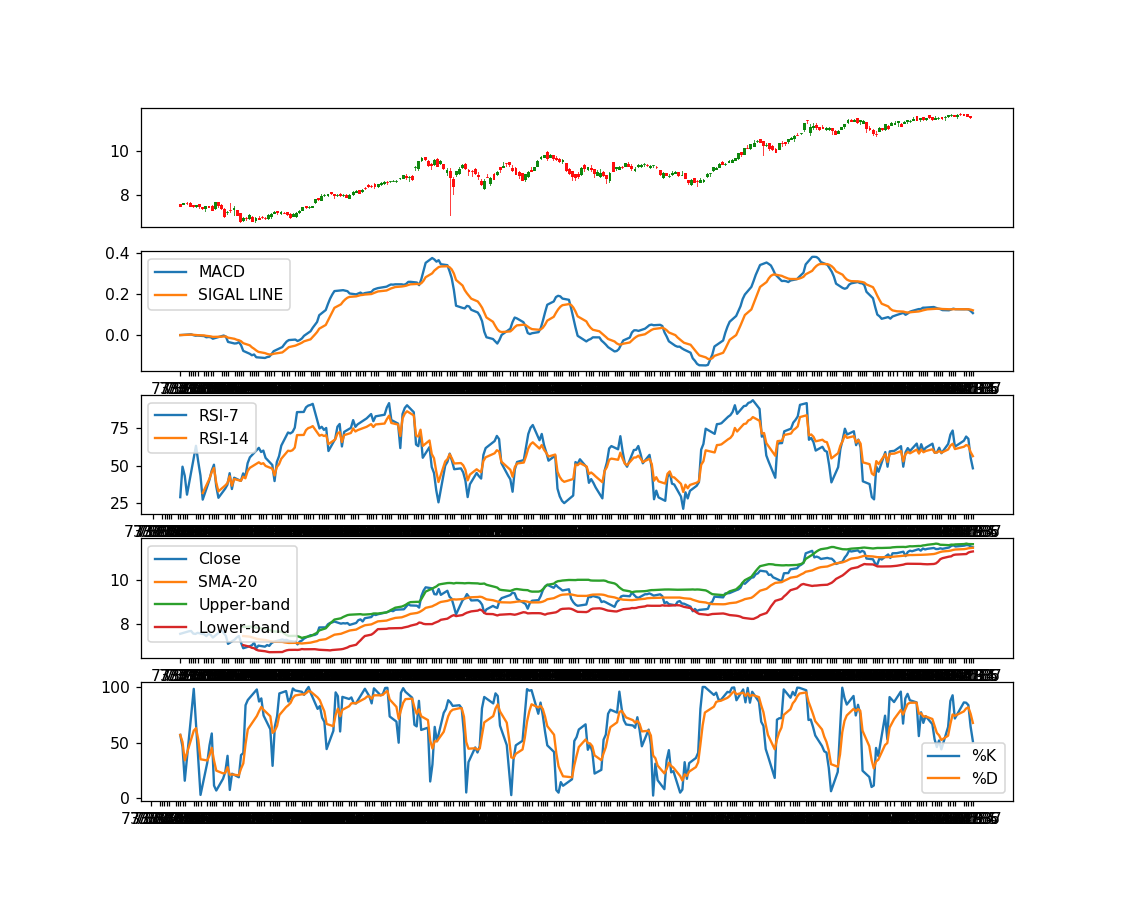

In [47]:
fig, ax = plt.subplots(5,figsize=(10,8))
plt.setp(ax, xticks=x)
candlestick2_ohlc(ax[0],df['Open'],df['High'],df['Low'],df['Close'],width=0.6,colorup='g',colordown='r')
ax[1].plot(df[['MACD','SIGNAL LINE']])
ax[1].legend(['MACD','SIGAL LINE'])
# ax[1].title.set_text('MACD')
ax[2].plot(df[['RSI-7','RSI-14']])
ax[2].legend(df[['RSI-7','RSI-14']])
ax[3].plot(df[['Close','SMA-20','Upper-band','Lower-band']])
ax[3].legend(df[['Close','SMA-20','Upper-band','Lower-band']])
ax[4].plot(df[['%K','%D']])
ax[4].legend(df[['%K','%D']])

In [15]:
# plt.plot(df['Close'])
# plt.plot(df['buy'],color='yellow')
# plt.plot(df['sold'],color='red')
# plt.show()

<IPython.core.display.Javascript object>


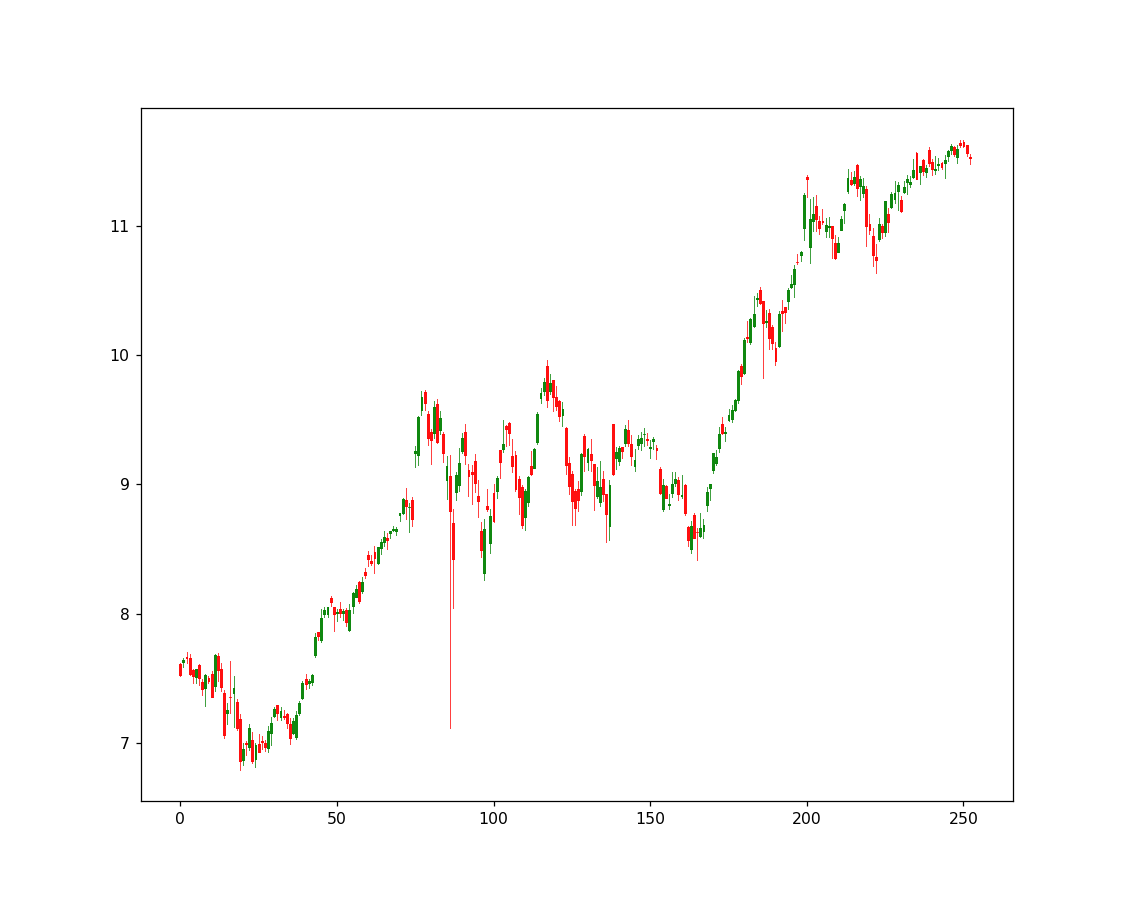

(<matplotlib.collections.LineCollection at 0x1cf2c504248>,
 <matplotlib.collections.PolyCollection at 0x1cf2c5043c8>)

In [48]:
# df =df.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
candlestick2_ohlc(ax,df['Open'],df['High'],df['Low'],df['Close'],width=0.6,colorup='g',colordown='r')


In [50]:
fp.candlestick_ochl(df[['Open','Close','High','Low']])
fp.show()

In [29]:
df

,High,Low,Open,Close,Volume,Adj Close,signal,buy,sold,EWMA-5,...,EWMA-26,MACD,SIGNAL LINE,RSI-7,RSI-14,SMA-20,Upper-band,Lower-band,%K,%D
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526072,352410800,6.503574,Wait or Hold,NaN,NaN,7.526072,...,7.526072,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600,6.604801,Wait or Hold,NaN,NaN,7.596357,...,7.586896,0.002628,0.001460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.699643,7.616071,7.664286,7.656428,601904800,6.616219,Wait or Hold,NaN,NaN,7.624812,...,7.611878,0.003759,0.002402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,7.686786,7.526786,7.656428,7.534643,552160000,6.510980,Wait or Hold,NaN,NaN,7.587357,...,7.590286,-0.000216,0.001515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,7.571429,7.466072,7.562500,7.520714,477131200,6.498945,Wait or Hold,NaN,NaN,7.561774,...,7.574152,-0.002926,0.000194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-27,11.622857,11.482857,11.530357,11.595715,249816000,10.020309,Wait or Hold,NaN,NaN,11.563089,...,11.374707,0.126086,0.126466,66.532900,62.520829,11.435232,11.669241,11.201223,86.114855,78.102604
2010-12-28,11.666429,11.609285,11.639643,11.623929,175924000,10.044692,sold,NaN,11.623929,11.583369,...,11.393168,0.126569,0.126487,69.291397,63.635297,11.450589,11.692063,11.209115,85.883888,80.696366
2010-12-29,11.658929,11.610714,11.650714,11.617500,163139200,10.039138,sold,NaN,11.617500,11.594746,...,11.409785,0.124992,0.126188,67.805734,63.174345,11.475839,11.669298,11.282381,83.748606,81.713779


In [31]:
df = df.reset_index()